# Introduction

* Aim of this notebook is to run a good EDA on fMNIST dataset, train a neural network using Tensorflow.

# Obtaining the Data

## Load the dataset & required libraries

In [199]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
df_training = pd.read_csv('data/fashion-mnist_train.csv')
df_testing = pd.read_csv('data/fashion-mnist_test.csv')

## Understand the dataset deeply

In [200]:
df_training.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


* Each row is a separate image
* Column 1 is the class label.
* Remaining columns are pixel numbers (784 total).
* Each value is the darkness of the pixel (1 to 255)

In [201]:
# unique labels
labels = sorted(df_training.label.unique().tolist())
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

**Each training and test example is assigned to one of the following labels:**

| Label | Category    |
|-------|-------------|
| 0     | T-shirt/top |
| 1     | Trouser     |
| 2     | Pullover    |
| 3     | Dress       |
| 4     | Coat        |
| 5     | Sandal      |
| 6     | Shirt       |
| 7     | Sneaker     |
| 8     | Bag         |
| 9     | Ankle boot  |




# Data Preprocessing

## Numpy array & Split Data 

In [202]:
# Conveting to numpy arrays

df_train = df_training.to_numpy()
df_test = df_testing.to_numpy()

# Split the data into features and labels

train_labels  = df_train[:,0]
train_features = df_train[:,1:]
test_labels  = df_test[:,0]
test_features = df_test[:,1:]

print(f'Image DType: {type(train_features)}')
print(f'Image Element DType: {type(train_features[0,0])}')
print(f'Label Element DType: {type(train_labels[0])}')
print('**Shapes:**')
print('Train Data:')
print(f'Images: {train_features.shape}')
print(f'Labels: {train_labels.shape}')
print('Test Data:')  
print(f'Images: {test_features.shape}')
print(f'Labels: {test_labels.shape}')
print('Image Data Range:')
print(f'Min: {train_features.min()}')
print(f'Max: {train_features.max()}')

Image DType: <class 'numpy.ndarray'>
Image Element DType: <class 'numpy.int64'>
Label Element DType: <class 'numpy.int64'>
**Shapes:**
Train Data:
Images: (60000, 784)
Labels: (60000,)
Test Data:
Images: (10000, 784)
Labels: (10000,)
Image Data Range:
Min: 0
Max: 255


## Reshaping & Normalizing the data

In [203]:
# reshping the data
train_images = train_features.reshape((60000, 28 * 28))  
test_images = test_features.reshape((10000, 28 * 28))

# Normalize the data
train_images = train_images.astype("float32") / 255  
test_images = test_images.astype("float32") / 255

In [204]:
# Display the min, max, and shape of the training images

print(train_images.min())
print(train_images.max())
print(train_images.shape)
print(train_images[0].shape)

0.0
1.0
(60000, 784)
(784,)


# Exploratory Data Analysis

## First 10 Images 

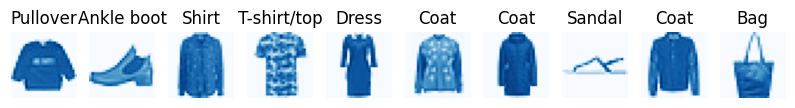

In [205]:
label_vis = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
fig, axes = plt.subplots(1, 10, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(train_images[i].reshape(28, 28), cmap='Blues')
    ax.set_title(label_vis[train_labels[i]])
    ax.axis('off')
plt.show()

* Visualization shows the first 10 images with their labels from the training set. Each image is a 28x28 bluescale representation of a fashion item, such as a shoe, bag, or piece of clothing.

## Understanding the class distribution : Frequency 

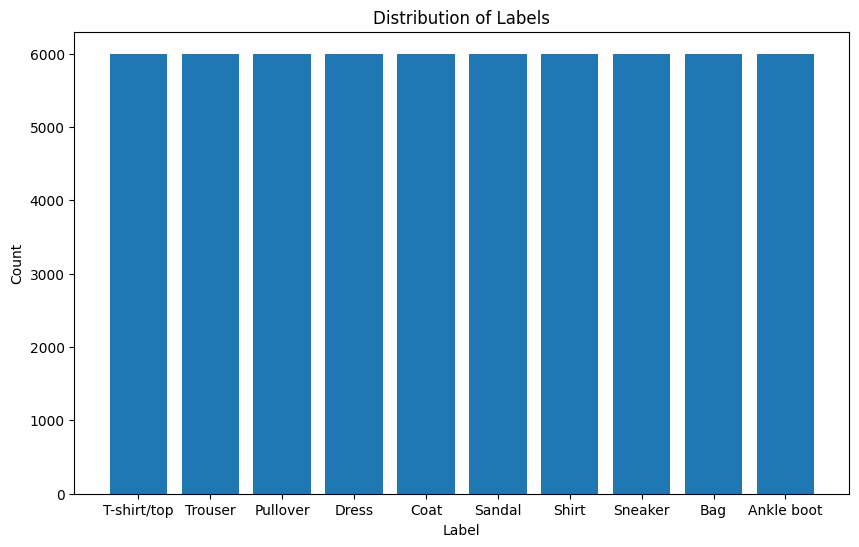

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
      dtype=int64)

In [206]:
labels, counts = np.unique(df_training['label'], return_counts=True)
plt.figure(figsize=(10, 6))
plt.bar(labels, counts)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(labels, label_vis)  
plt.show()
display(labels,counts)

* Visualization displays the distribution of labels in the training set. The distribution is relatively uniform, indicating a balanced dataset which is beneficial for training a model.

# Creating the Model

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# Compile the model

In [ ]:
model.compile(optimizer="rmsprop",  
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Train the model

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 5ms/step - loss: 0.5598 - accuracy: 0.8004
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.3885 - accuracy: 0.8581
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.3442 - accuracy: 0.8731
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.3178 - accuracy: 0.8829
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.2989 - accuracy: 0.8893


# Model Evaluation with validation set

## Accuracy

In [249]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# split the data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(
                            train_images, train_labels, 
                            test_size=0.2, random_state=42)

# Make predictions
y_pred_probs = model.predict(val_images)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)
print(y_pred)
# Calculate accuracy
accuracy = accuracy_score(val_labels, y_pred)
print(f'Accuracy of the model is {accuracy:.3f}')

240/240 [==============================] - 0s 1ms/step
[2 0 5 ... 5 3 3]
Accuracy of the model is 0.894


* Accuracy of the model is .894.
* Accuracy of .897 means the model predictions are correct. That is approximately 89.7 % of the images in validation set is predicted correctly.

## Precison,Recall & F1 Score for each class

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

my_class = np.unique(train_labels)
prec = []
recall = []
f1= []
for i in my_class:
    # Filter predictions and  labels for the current class
    y_cls_pred = (y_pred == i)
    y_cls_true = (val_labels == i)
    
    # Calculate precision, recall, and F1-score for the current class
    precision_i = precision_score(y_cls_true, y_cls_pred)
    recall_i = recall_score(y_cls_true, y_cls_pred)
    f1_i = f1_score(y_cls_true, y_cls_pred)

    # appending values to list

    prec.append(precision_i)
    recall.append(recall_i)
    f1.append(f1_i)
results = {'Class': my_class, 'Precision': prec, 'Recall': recall, 'F1-score': f1}
df_results = pd.DataFrame(results)
df_results

,Class,Precision,Recall,F1-score
0,0,0.861158,0.820617,0.840399
1,1,0.981293,0.982964,0.982128
2,2,0.885128,0.719167,0.793563
3,3,0.928934,0.884058,0.905941
4,4,0.784728,0.815190,0.799669
5,5,0.975716,0.985977,0.980820
6,6,0.656230,0.809332,0.724784
7,7,0.982609,0.923203,0.951980
8,8,0.980919,0.984334,0.982624
9,9,0.938727,0.987603,0.962545


* This table shows the  model is performaing well.
* Class 1,5,7,8,9 has high precison,recall,f1.
* This means the model is predicting correctly for theese classes than others.
* Class 6 has the lowest precison & f1 score.

## Run on Test Set & Conclusions

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Set Accuracy is : {test_acc:.3f}")

313/313 [==============================] - 1s 2ms/step - loss: 0.3373 - accuracy: 0.8750
Test Set Accuracy is : 0.875


* Model shows a good accuracy in test data as well with a value of .875.
* This means 87.5 % of the images in test dataset are predicting correctly.

# Increase the Precison for class '5'

* To increase the precision for class '5', adjust the classification threshold for this class.
* I am keeping high threshold value for class 5.
* This will help to reduce the false positives.

In [ ]:
# Predict probabilities for the test set
class5_prob = model.predict(test_images)

# higher threshold for class '5'
threshold = 0.9 

# Apply the new threshold for class '5'
y_pred_adjusted = np.array([5 if prob[5] >= threshold else np.argmax(prob) for prob in class5_prob])

precision = precision_score(test_labels, y_pred_adjusted, labels=[5], average='micro')
print(f'Adjusted Precision for class 5: {precision}')

313/313 [==============================] - 1s 2ms/step
Adjusted Precision for class 5: 0.9596367305751766


# Increase the Recall for class '5'

* To increase the recall for class '5' without changing the model or retraining, we have to adjust the prediction threshold. 
* By decreasing the threshold, make the criteria for predicting class '5' less stringent, which can increase recall at the cost of precision.

In [ ]:
# lower threshold for class '5'
threshold = 0.01  

# Apply the new threshold for class '5'
y_pred_adjusted = np.array([5 if prob[5] >= threshold else np.argmax(prob) for prob in class5_prob])

from sklearn.metrics import recall_score
recall = recall_score(test_labels, y_pred_adjusted, labels=[5], average='micro')
print(f'Adjusted Recall for class 5: {recall}')

Adjusted Recall for class 5: 0.993


# Lab 9
## Three different models are below.

# Model 1
## Creating & Compiling the Model

## For this Model I am changing the number of input neurons to 1024 from 512


In [ ]:
model_1 = keras.Sequential([
    layers.Dense(1024, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model_1.compile(optimizer="rmsprop",  
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

## Train the model

In [ ]:
history_1 = model_1.fit(train_images,
                    train_labels,
                    epochs=30,
                    batch_size=128,
                    validation_data=(val_images, val_labels))

history_1_dict = history_1.history
history_1_dict.keys()

Epoch 1/30


375/375 [==============================] - 5s 11ms/step - loss: 0.6076 - accuracy: 0.7888 - val_loss: 0.4138 - val_accuracy: 0.8500
Epoch 2/30
375/375 [==============================] - 4s 10ms/step - loss: 0.4045 - accuracy: 0.8518 - val_loss: 0.3981 - val_accuracy: 0.8568
Epoch 3/30
375/375 [==============================] - 4s 11ms/step - loss: 0.3568 - accuracy: 0.8687 - val_loss: 0.4154 - val_accuracy: 0.8431
Epoch 4/30
375/375 [==============================] - 4s 11ms/step - loss: 0.3295 - accuracy: 0.8785 - val_loss: 0.3331 - val_accuracy: 0.8788
Epoch 5/30
375/375 [==============================] - 4s 10ms/step - loss: 0.3055 - accuracy: 0.8877 - val_loss: 0.3632 - val_accuracy: 0.8592
Epoch 6/30
375/375 [==============================] - 4s 11ms/step - loss: 0.2905 - accuracy: 0.8923 - val_loss: 0.4356 - val_accuracy: 0.8523
Epoch 7/30
375/375 [==============================] - 4s 11ms/step - loss: 0.2751 - accuracy: 0.8978 - val_loss: 0.3287 - val_accuracy: 0.8835
Epoch 8/30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
hist_df_1 = pd.DataFrame(history_1_dict)
hist_df_1

,loss,accuracy,val_loss,val_accuracy
0,0.607575,0.788813,0.413762,0.850000
1,0.404543,0.851771,0.398070,0.856750
2,0.356811,0.868708,0.415438,0.843083
3,0.329518,0.878521,0.333102,0.878750
4,0.305500,0.887688,0.363164,0.859167
5,0.290486,0.892313,0.435577,0.852333
6,0.275065,0.897792,0.328743,0.883500
7,0.262919,0.900375,0.341350,0.877750
8,0.252974,0.906292,0.321389,0.883917
9,0.241215,0.909833,0.343158,0.882917


## Printing out the Model Summary

In [ ]:
model_1.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 1024)              803840    
                                                                 
 dense_36 (Dense)            (None, 10)                10250     
                                                                 
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________


## Run on Test Set

In [ ]:
test_loss, test_acc = model_1.evaluate(test_images, test_labels)
print(f"Test Set Accuracy is : {test_acc:.3f}")

 18/313 [>.............................] - ETA: 0s - loss: 0.3471 - accuracy: 0.9062

313/313 [==============================] - 1s 3ms/step - loss: 0.3937 - accuracy: 0.8934
Test Set Accuracy is : 0.893


* Model shows a good accuracy in test data as well with a value of .893.
* This means 89.3 % of the images in test dataset are predicting correctly.

## Training and  Validation loss

Text(0.5, 1.0, 'Training and validation loss')

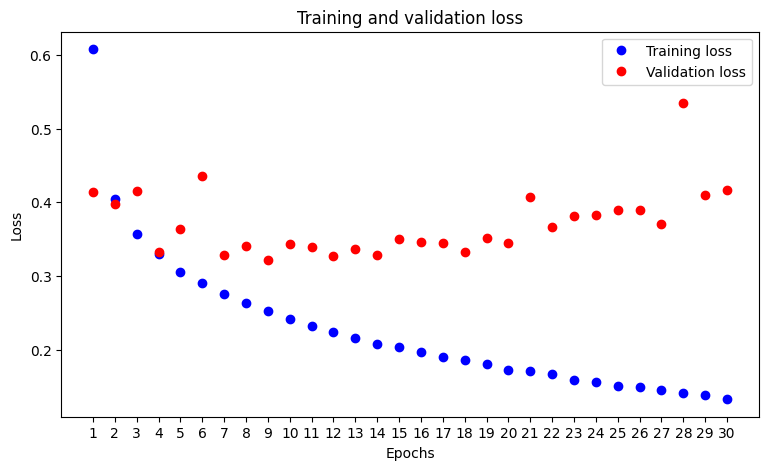

In [ ]:
# plot the training and validation loss
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 5))
loss_1_values = history_1_dict["loss"]
val_loss_1_values = history_1_dict["val_loss"]
epochs_1 = range(1, len(loss_1_values) + 1)
plt.plot(epochs_1, loss_1_values, "bo", label="Training loss")
plt.plot(epochs_1, val_loss_1_values, "ro", label="Validation loss")
plt.xlabel("Epochs")
plt.xticks(epochs_1)
plt.ylabel("Loss")
plt.legend()
plt.title("Training and validation loss")

## Training and Validation accuracy

Text(0.5, 1.0, 'Training and validation accuracy')

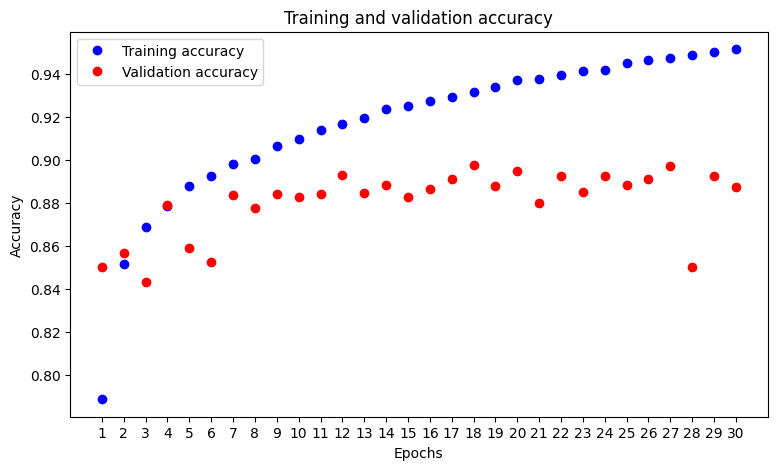

In [ ]:
# plot the training and validation accuracy
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 5))
loss_1_values = history_1_dict["accuracy"]
val_loss_1_values = history_1_dict["val_accuracy"]
epochs_1 = range(1, len(loss_1_values) + 1)
plt.plot(epochs_1, loss_1_values, "bo", label="Training accuracy")
plt.plot(epochs_1, val_loss_1_values, "ro", label="Validation accuracy")
plt.xlabel("Epochs")
plt.xticks(epochs_1)
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and validation accuracy")

## Conclusions

**Training & Validation loss**
* This model performs well on the training data but not on validation data.
* The validation loss start to increase after epoch 13. The model have less loss until the epoch 13.
* This is a case of overfitting.
* For the first five epochs models works perfect and the model was stabilizing to a point.
* There is a noticeable gap between the training and validation loss.

**Accuracy**
* The accuracy keeps increasing for training data and for validation also we are getting a good value of accuracy

**Weights & Epoch**

* Weights corresponds to epoch 17 are the best weights, where the val_accuracy is the highest (0.897417) and val_loss is relatively low compared to other epochs (0.332687).



# Model 2

## Creating & Compiling the model

## In second model, I have added one more hidden layer which uses the relu activation function.

In [ ]:
model_2 = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(256, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model_2.compile(optimizer="rmsprop",  
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

## Train the Model

In [ ]:
history_2 = model_2.fit(train_images,
                    train_labels,
                    epochs=30,
                    batch_size=128,
                    validation_data=(val_images, val_labels))

history_2_dict = history_2.history
history_2_dict.keys()

Epoch 1/30


375/375 [==============================] - 4s 8ms/step - loss: 0.5776 - accuracy: 0.7902 - val_loss: 0.4191 - val_accuracy: 0.8441
Epoch 2/30
375/375 [==============================] - 3s 9ms/step - loss: 0.3973 - accuracy: 0.8536 - val_loss: 0.3773 - val_accuracy: 0.8536
Epoch 3/30
375/375 [==============================] - 3s 9ms/step - loss: 0.3498 - accuracy: 0.8702 - val_loss: 0.3328 - val_accuracy: 0.8759
Epoch 4/30
375/375 [==============================] - 3s 8ms/step - loss: 0.3224 - accuracy: 0.8819 - val_loss: 0.3440 - val_accuracy: 0.8721
Epoch 5/30
375/375 [==============================] - 3s 9ms/step - loss: 0.3015 - accuracy: 0.8885 - val_loss: 0.3794 - val_accuracy: 0.8625
Epoch 6/30
375/375 [==============================] - 3s 9ms/step - loss: 0.2821 - accuracy: 0.8941 - val_loss: 0.3340 - val_accuracy: 0.8786
Epoch 7/30
375/375 [==============================] - 3s 9ms/step - loss: 0.2661 - accuracy: 0.9002 - val_loss: 0.3477 - val_accuracy: 0.8731
Epoch 8/30
375/37

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
hist_df_2 = pd.DataFrame(history_2_dict)
hist_df_2

,loss,accuracy,val_loss,val_accuracy
0,0.577575,0.790167,0.419137,0.844083
1,0.397288,0.853625,0.377293,0.853583
2,0.349804,0.870188,0.332814,0.875917
3,0.322414,0.881854,0.343996,0.872083
4,0.301528,0.888521,0.379434,0.862500
5,0.282131,0.894125,0.334025,0.878583
6,0.266148,0.900167,0.347745,0.873083
7,0.253752,0.904542,0.337285,0.879333
8,0.243965,0.909708,0.319201,0.889083
9,0.233269,0.912875,0.335458,0.880333


## Printing out the Model Summary

In [ ]:
model_2.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 512)               401920    
                                                                 
 dense_38 (Dense)            (None, 256)               131328    
                                                                 
 dense_39 (Dense)            (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


## Run on Test Set

In [ ]:
test_loss, test_acc = model_2.evaluate(test_images, test_labels)
print(f"Test Set Accuracy is : {test_acc:.3f}")

 35/313 [==>...........................] - ETA: 0s - loss: 0.4062 - accuracy: 0.9009

313/313 [==============================] - 1s 2ms/step - loss: 0.4763 - accuracy: 0.8964
Test Set Accuracy is : 0.896


## Training and Validation loss

Text(0.5, 1.0, 'Training and validation loss')

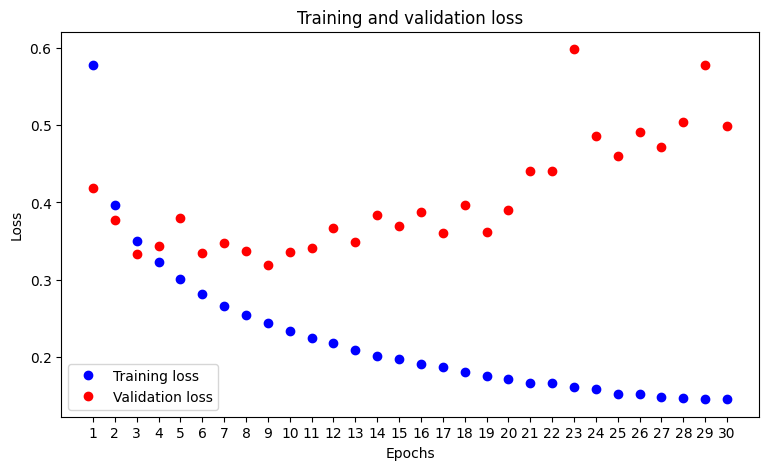

In [ ]:
# plot the training and validation loss
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 5))
loss_2_values = history_2_dict["loss"]
val_loss_2_values = history_2_dict["val_loss"]
epochs_2 = range(1, len(loss_2_values) + 1)
plt.plot(epochs_2, loss_2_values, "bo", label="Training loss")
plt.plot(epochs_2, val_loss_2_values, "ro", label="Validation loss")
plt.xlabel("Epochs")
plt.xticks(epochs_2)
plt.ylabel("Loss")
plt.legend()
plt.title("Training and validation loss")

## Training and Validation accuracy

Text(0.5, 1.0, 'Training and validation accuracy')

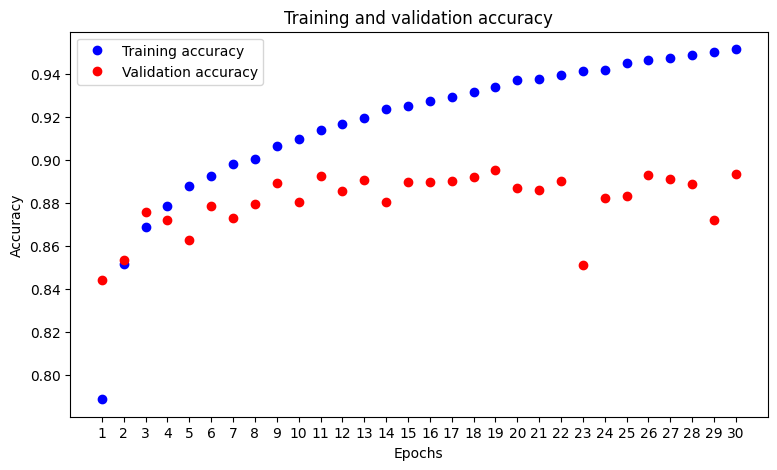

In [ ]:
# plot the training and validation accuracy
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 5))
loss_2_values = history_2_dict["accuracy"]
val_loss_2_values = history_2_dict["val_accuracy"]
epochs_2 = range(1, len(loss_2_values) + 1)
plt.plot(epochs_2, loss_1_values, "bo", label="Training accuracy")
plt.plot(epochs_2, val_loss_2_values, "ro", label="Validation accuracy")
plt.xlabel("Epochs")
plt.xticks(epochs_2)
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and validation accuracy")

## Conclusions

**Training & Validation loss**
* This model performs well on the training data but not on validation data.
* The validation loss start to increase after epoch 4. The model have less loss until the epoch 4.
* The gap between validation and training loss is very high.
* This is an indicator of overfitting.
* For the first four epochs models works perfect and the model was stabilizing to a point.

**Accuracy**

* We are getting accuracy almost similiar to the previous model for training and validation.

**Weights**
* The best set of weights seems to correspond to epoch 18, where val_accuracy is the highest (0.895167) and val_loss is relatively low compared to other epochs (0.362099).
	

# Model 3

## For this Model, I am chaging activation function to tanh from ReLu for the input layer


### Creating & Compelling the model

In [250]:
model_3 = keras.Sequential([
    layers.Dense(1024, activation="tanh"),
    layers.Dense(10, activation="softmax")
])

model_3.compile(optimizer="rmsprop",  
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### Model Checkpoint

In [251]:
checkpoint_filepath = 'best_model.hdf5'  # Filepath where you want to save the model

model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,  # Optionally save only weights instead of the full model
    monitor='val_loss',
    mode='min',  # Monitor validation loss and save on minimum
    save_best_only=True)

### Train the Model

In [252]:
history_3 = model_3.fit(train_images,
                    train_labels,
                    epochs=30,
                    batch_size=128,
                    validation_data=(val_images, val_labels),
                    callbacks=[model_checkpoint_callback]
                    )

history_3_dict = history_3.history
history_3_dict.keys()

Epoch 1/30
240/240 [==============================] - 2s 9ms/step - loss: 0.7872 - accuracy: 0.7421 - val_loss: 0.5484 - val_accuracy: 0.7992
Epoch 2/30
240/240 [==============================] - 2s 8ms/step - loss: 0.5215 - accuracy: 0.8079 - val_loss: 0.4560 - val_accuracy: 0.8305
Epoch 3/30
240/240 [==============================] - 2s 8ms/step - loss: 0.4632 - accuracy: 0.8301 - val_loss: 0.5023 - val_accuracy: 0.8139
Epoch 4/30
240/240 [==============================] - 2s 9ms/step - loss: 0.4301 - accuracy: 0.8402 - val_loss: 0.4485 - val_accuracy: 0.8365
Epoch 5/30
240/240 [==============================] - 3s 12ms/step - loss: 0.4039 - accuracy: 0.8499 - val_loss: 0.3927 - val_accuracy: 0.8578
Epoch 6/30
240/240 [==============================] - 3s 11ms/step - loss: 0.3832 - accuracy: 0.8581 - val_loss: 0.4202 - val_accuracy: 0.8473
Epoch 7/30
240/240 [==============================] - 3s 11ms/step - loss: 0.3646 - accuracy: 0.8655 - val_loss: 0.3548 - val_accuracy: 0.8712
Epo

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [254]:
hist_df_3 = pd.DataFrame(history_3_dict)
hist_df_3

,loss,accuracy,val_loss,val_accuracy
0,0.787157,0.742122,0.548361,0.799219
1,0.521542,0.807910,0.456008,0.830469
2,0.463224,0.830078,0.502307,0.813932
3,0.430057,0.840169,0.448467,0.836458
4,0.403909,0.849902,0.392681,0.857813
5,0.383183,0.858138,0.420228,0.847266
6,0.364628,0.865527,0.354773,0.871224
7,0.348344,0.871354,0.388531,0.860417
8,0.339754,0.872819,0.352563,0.873307
9,0.324141,0.878548,0.384300,0.863932


## Printing out the Model Summary

In [255]:
model_3.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (128, 1024)               803840    
                                                                 
 dense_49 (Dense)            (128, 10)                 10250     
                                                                 
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________


## Run on Test Set & Conclusions

In [256]:
test_loss, test_acc = model_3.evaluate(test_images, test_labels)
print(f"Test Set Accuracy is : {test_acc:.3f}")

313/313 [==============================] - 1s 2ms/step - loss: 0.3704 - accuracy: 0.8831
Test Set Accuracy is : 0.883


## Training and Validation loss

Text(0.5, 1.0, 'Training and validation loss')

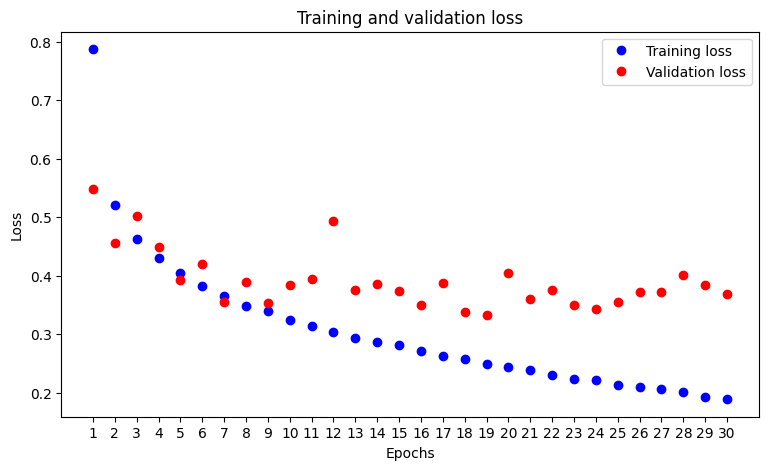

In [257]:
# plot the training and validation loss
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 5))
loss_3_values = history_3_dict["loss"]
val_loss_3_values = history_3_dict["val_loss"]
epochs_3 = range(1, len(loss_3_values) + 1)
plt.plot(epochs_3, loss_3_values, "bo", label="Training loss")
plt.plot(epochs_3, val_loss_3_values, "ro", label="Validation loss")
plt.xlabel("Epochs")
plt.xticks(epochs_3)
plt.ylabel("Loss")
plt.legend()
plt.title("Training and validation loss")

## Training and Validation accuracy

Text(0.5, 1.0, 'Training and validation accuracy')

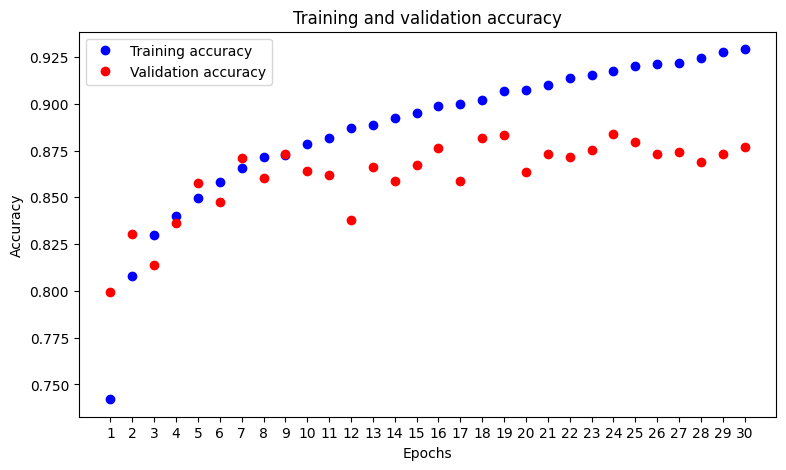

In [258]:
# plot the training and validation accuracy
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 5))
loss_3_values = history_3_dict["accuracy"]
val_loss_3_values = history_3_dict["val_accuracy"]
epochs_3 = range(1, len(loss_3_values) + 1)
plt.plot(epochs_3, loss_3_values, "bo", label="Training accuracy")
plt.plot(epochs_3, val_loss_3_values, "ro", label="Validation accuracy")
plt.xlabel("Epochs")
plt.xticks(epochs_3)
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and validation accuracy")

## Conclusions

**Training & Validation loss**
* This model performs well on training and validation data.
* For this model loss value is almost similiar in both training and validation data.
* We are geting a high difference value between training and validation loss is only at he very last epoch.
* The gap between training and validation is very low which indiactes a good model with less loss.

**Accuracy**

* We are getting high accuracy for both training and validation data.

**Weights**

* The best set of weights seems to correspond to epoch 24, where val_accuracy is the highest (0.894750) and val_loss is relatively low compared to other epochs (0.316536).

**Summarised Conclusion is give below**

| Model Name | Highest Val Accuracy | Val_Loss | Epoch |
|------------|----------------------|----------|-------|
| Model_1    |         0.897417             |   0.332687       |  17     |
| Model_2    |      0.895167                |    0.362099       |    18   |
| Model_3    |         0.894750      |  .316536        |    24   |


	

# Load the saved Model

In [259]:
from keras.models import load_model

best_model = load_model('best_model.hdf5') 

# Model Evaluation with best model

In [260]:
# Make predictions
y_pred_probs_best = best_model.predict(val_images)

# Convert probabilities to class labels
y_pred_best = np.argmax(y_pred_probs_best, axis=1)
print(y_pred)
# Calculate accuracy
accuracy_best = accuracy_score(val_labels, y_pred)
print(f'Accuracy of the model is {accuracy_best:.3f}')

240/240 [==============================] - 1s 2ms/step
[2 0 5 ... 5 3 3]
Accuracy of the model is 0.894


## Precison,Recall & F1 Score for each class

In [264]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import precision_score, recall_score, f1_score

my_class = np.unique(val_images)
prec_best = []
recall_best = []
f1_best= []
for i in my_class:
    # Filter predictions and labels for the current class
    y_cls_pred_best = (y_pred_best == i)
    y_cls_true_best = (val_labels == i)
    
    # Calculate precision, recall, and F1-score for the current class
    precision_i_best = precision_score(y_cls_true_best, y_cls_pred_best)
    recall_i_best = recall_score(y_cls_true_best, y_cls_pred_best)
    f1_i_best = f1_score(y_cls_true_best, y_cls_pred_best)

    # Append values to list
    prec_best.append(precision_i_best)
    recall_best.append(recall_i_best)
    f1_best.append(f1_i_best)

results = {'Class': my_class, 'Precision': prec_best, 'Recall': recall_best, 'F1-score': f1_best}
df_results = pd.DataFrame(results)
df_results

,Class,Precision,Recall,F1-score
0,0.000000,0.875342,0.808861,0.840789
1,0.003922,0.000000,0.000000,0.000000
2,0.007843,0.000000,0.000000,0.000000
3,0.011765,0.000000,0.000000,0.000000
4,0.015686,0.000000,0.000000,0.000000
...,...,...,...,...
251,0.984314,0.000000,0.000000,0.000000
252,0.988235,0.000000,0.000000,0.000000
253,0.992157,0.000000,0.000000,0.000000
254,0.996078,0.000000,0.000000,0.000000


## Run on Test Set & Conclusion

In [265]:
test_loss, test_acc = best_model.evaluate(test_images, test_labels)
print(f"Test Set Accuracy is : {test_acc:.3f}")

313/313 [==============================] - 1s 2ms/step - loss: 0.3343 - accuracy: 0.8809
Test Set Accuracy is : 0.881


* We are getting enough accuracy for the selected best model.